# Phase 1 Milestone 2

# A. Introduction

by Handoko Pramulyo | Batch : FTDS-014

Case yang akan diangkat pada milestone ini adalah terkait pembuatan model regresi dari dataset **Diamonds Prices**. Dataset yang digunakan berisi kumpulan data harga dan atribut untuk sekitar 54.000 round-cut diamonds. Dataset ini terdiri dari 10 fitur, yaitu karat, cut, warna, clarity, depth, table, harga (dalam \$), serta dimensi dalam x, y, dan z dlm (mm). Sebagian besar feature bersifat numerik, tetapi variabel cut, warna, dan clarity merupakan feature categorical. Semenjak terdapat cukup banyak parameter yang bisa menetukan harga diamonds, maka akan cukup sulit bagi retail business owner ketika ingin me-release harga baru untuk new diamonds tersebut kepada public, or akan sulit untuk membeli diamonds dengan harga yang tepat dari pricipal manufacture diaomonds tersebut. So, dengan membuat model ML regresi, problem dengan impact value $ yang besar ini bisa menjadi alternatif dalam menentukan harga diamond dengan baik tanpa perlu meng-hire diamond price estimator.

Source of data : https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

Deployment app link : https://frontend-diamonds.herokuapp.com

Objective : Membuat **Model Regresi pada dataset Diamonds Prices** , `Label : Price`

# B. Import Libraries

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import xgboost as xg
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
import joblib
import json

Pada case Machine Learning ini, library yang akan digunakan adalah scikit-learn & xgboost (Machine Learning library in Python), library yang dedicated dibuat untuk Machine Learning. Simple and efficient tools for predictive data analysis, Accessible to everybody, and reusable in various contexts, Built on NumPy, SciPy, and matplotlib, Open source, dan sekaligus commercially usable. OK, lets proceed to the next part.

# C. Data Loading

Pada bagian ini, kita akan coba isi dengan proses penyiapan data (pd read) sebelum dilakukan eksplorasi data lebih lanjut (atau yang biasa disebut dengan EDA). Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom (opsional), melihat gambaran umum dari data, mengecek ukuran dataset, dll.

In [4]:
# Load Dataset 
data = pd.read_csv('h8dsft_Milestone2P1_Handoko_Pramulyo.csv') # Read CSV file
# data = pd.read_excel('filename.xlsx', index_col=None, header=None) # Read Excel file
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53942,53943,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


Data observasi OKE (lebih dari 50 jumlah observasi --> based on sclearn recommendation) dengan jumlah feature yang proporsional, maka yang bisa kita artikan bahwa model yang akan dibuat 'most likely' low possibility untuk overfit (due to low variance which is good. ```Additional conclusion based on least square``` Jennifer Zhao in medium.com).

In [6]:
# Duplicate Dataset
data_copy = data.copy()
label_name = 'price'

In [7]:
# Check Dataset (looking up for missing value and understanding the dataset Dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


**Dataset terdiri dari int, float dan object. No Nulled data!**

In [8]:
# Check Dataset
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Berdasarkan dari gambaran data, rata-rata dan median jenis carat diamonds pada dataset adalah sebesar ~0.8 dan ~0.7. Ukuran carat diamonds (value media to average) tersebut sebetulnya paling sering digunakan pada pembuatan cincin tunangan atau pernikahan (diamonds.pro). Carat diamonds yang lebih besar dari 1 sudah cukup besar secara ukuran sehingga lebih mudah untuk di-notice oleh banyak orang saat digunakan (max carat - 5.01 - might be legitimate outliers). Adapun rata-rata dan median depth dan table menunjukkan bahwa diamonds pada dataset mostly memiliki kualitas yang cukup baik. Dari beberapa sumber (torresjewelco.com), Dept diamond yang excellent adalah sebesar 59 sd 60% dari total diameter diamonds, sedangkan untuk table adalah sebesar 53 sd 60%. Dari sisi price, terdapat GAP yang sangat fantastis (Max - Min), yaitu sebesar ~ 18.5K, dan mayority dari dataset ini adalah diamonds dengan median harga yang cukup mahal, yaitu sekitar ~ 2400. Padahal perspective market indonesia & dunia dgn the most diamonds sales price-nya adalah justru sebesar 1000 sd 2000 atau sekitar Rp15 juta, (by cnbc.com), demikian price dari diamond terdistribusi skew yang artinya terapat diamond buyer or auction yang sangat kaya raya (sultan or billioner) yang mampu membeli diamond dengan harga yang sangat fantastif, dan jumlah mereka tidaklah sedikit (by cnbc.com).

# D. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset yang sudah kita load pada bagian pertama dengan menggunakan query, grouping, dan visualisasi sederhana (lets find out something interesting within the data). ```Lets find correlation between numerical feature before proceed even further!```

In [9]:
# Define plot style
plt.style.use('ggplot')

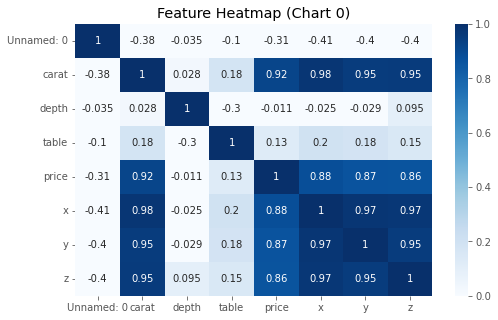

In [10]:
corr = data.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, vmin=0, vmax=1, cmap="Blues")
plt.title('Feature Heatmap (Chart 0)')
plt.xticks(rotation=0)
plt.show()

Hampir semua feature numerical memiliki korelasi yang cukup tinggi terhadap price (exlude columns index : Unnamed:0), di antaranya adalah carat serta dimensi dari diamonds (x, y, dan z). Adapun depth dan table tidak begitu memiliki korelasi yang tinggi pada price (korelasi < 0.2). Namun ada satu hal yang perlu diperhatikan, yaitu sifat multicollinearity pada dataset yang terjadi akibat feature carat yang berkorelasi cukup tinggi dengan dimensi (x, y, dan Z). Oleh karena itu, modeling regresi dengan linear regresi might be a bad idea (model regresi linear which could perform poorly with multicollinearity dataset), namun model lain seperti decision tree, random forest, serta turunan model booster lainnya seperti XgBoost might be a solution to avoid multicollinearity.

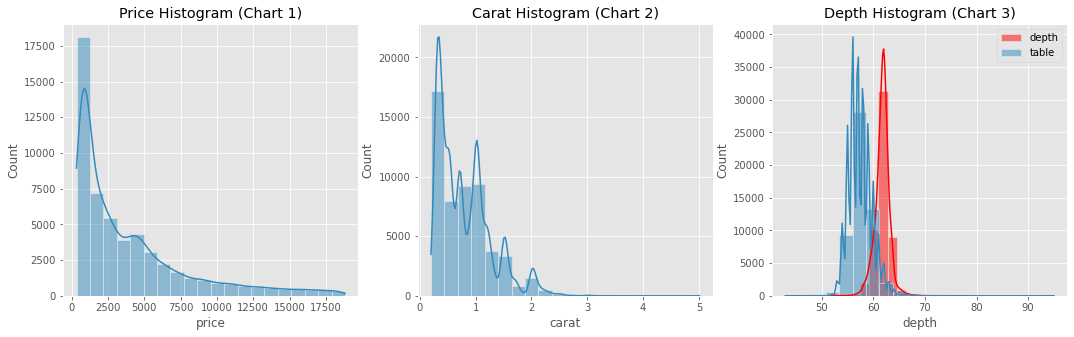

In [11]:
# Create Histogram and Scatter Plot
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1), sns.histplot(data['price'], bins=20, kde=True), plt.title('Price Histogram (Chart 1)')
plt.subplot(1, 3, 2), sns.histplot(data['carat'], bins=20, kde=True), plt.title('Carat Histogram (Chart 2)')
plt.subplot(1, 3, 3), sns.histplot(data['depth'], bins=20, kde=True, label="depth", color="red")
sns.histplot(data['table'], bins=20, kde=True, label="table"), plt.title('Depth Histogram (Chart 3)'), plt.legend()

# set the spacing between subplots
plt.subplots_adjust(wspace=0.2)

plt.show()

Pada Chart 1, dapat dilihat bahwa jumlah harga diamonds yang paling banyak terjual (the most sales) adalah diamonds dengan harga pada range ~ 0 sd 2000 which is make sense karena dari sisi harga jauh lebih terjangkau bagi para buyer. Namun sangat tidak disangka bahwa terdapat sejumlah diamond dengan harga yang sangat mahal pun tetap memiliki market di pasar, seperti para kolektor, billioner, auction, dll (GAP yang sangat tinggi dari the most sales di range ~ 2000 sampai kepada harga max di ~ 17500). Pada Chart 2, bisa dilihat bahwa jumlah carat range ~ 0 sd 1 adalah diamond yang paling sering ditemukan di market. Menurut beberapa sumber seperti americangemsociety.org, hal ini terjadi karena carat diamonds yang sangat tinggi (tinggi > 1) sangat sulit ditemukan pada resourch mineral dunia (extremely rare, and once it's produce, the price will be extremely crazy expensive). Adapun pada chart 3, most diamond manufacture secara umum membuat diamonds dengan dimensi ratio yang proporsional, baik dari sisi table dan depth. Meskipun demikian, tetap ditemukan beberapa ukuran table dan depth yang jauh dari ideal (most probably due to limitation in machine technology during production). 

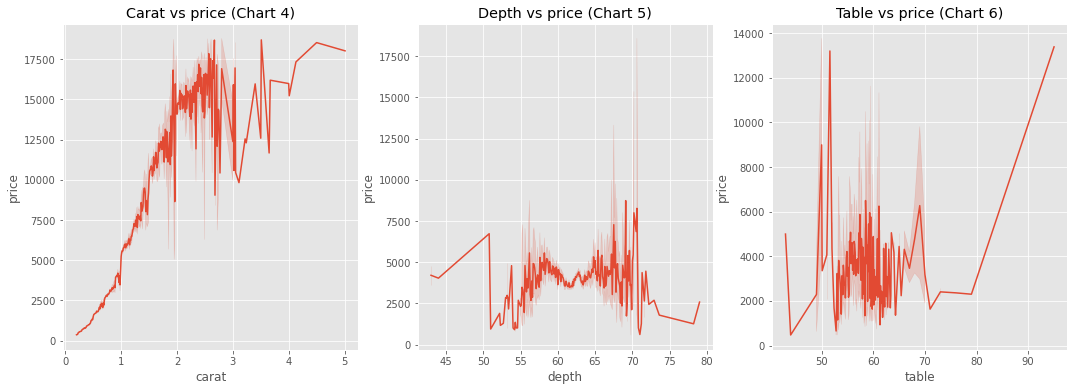

In [12]:
# Create Histogram and Scatter Plot
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1), sns.lineplot(x='carat', y='price', data=data), plt.title('Carat vs price (Chart 4)')
plt.subplot(1, 3, 2), sns.lineplot(x='depth', y='price', data=data), plt.title('Depth vs price (Chart 5)')
plt.subplot(1, 3, 3), sns.lineplot(x='table', y='price', data=data), plt.title('Table vs price (Chart 6)')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.2)

plt.show()

Sudah menjadi pengetahuan yang paling umum bahwa carat selalu menjadi parameter utama dalam menetukan harga diamonds (lihat chart 4), semakin tinggi carat pada diamond, maka tentu akan semakin tinggi harganya (konsep yang sama dengan emas). Terlihat pada chart 4 bahwa korelasi antara carat dan price terlihat sangat tinggi dan berkorelasi positif. Namun terlihat hal yang unik pada carat range 3 sd 5, price mostly tetap berada para harga yang tidak beda jauh dengan diamond dengan carat ~ 2 sd 3. Hal ini terjadi karena tingkat kesulitan produksi (kualitas cut, clarity, dan color) dari diamonds menjadi lebih sulit dari biasanya serta karena produksi dari diamond tersebut yang relatif diperkecil dari sisi dimensi sehingga buyer dan market bisa lebih menerima harga dari diamonds tersebut (www.gia.edu). Kemudian bisa dilihat pada chart 5 dan 6 bahwa depth dan table tidak berkorelasi signifikan terhadap price, hasil plot menunjukkan tidak ada trend + atau - antar ketiga features tersebut.

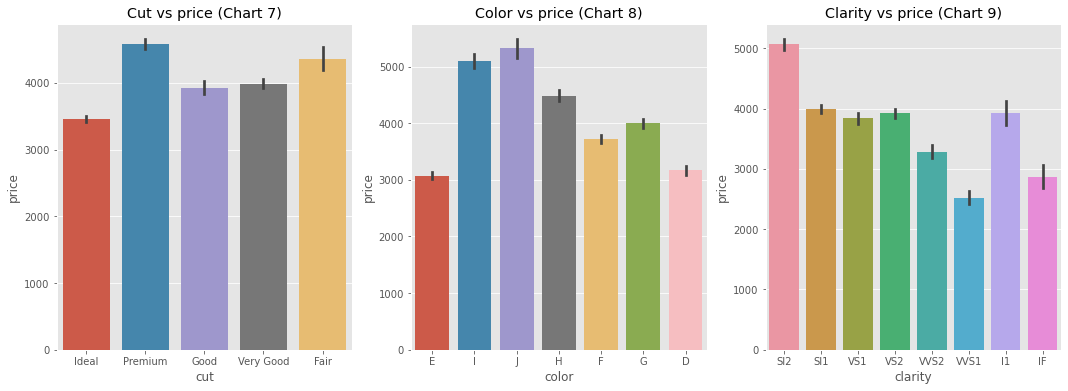

In [13]:
# Create Histogram and Scatter Plot
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1), sns.barplot(x='cut', y='price', data=data), plt.title('Cut vs price (Chart 7)')
plt.subplot(1, 3, 2), sns.barplot(x='color', y='price', data=data), plt.title('Color vs price (Chart 8)')
plt.subplot(1, 3, 3), sns.barplot(x='clarity', y='price', data=data), plt.title('Clarity vs price (Chart 9)')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

plt.show()

In [39]:
## Check all unique values
# ==========================
# Diamond cut grades level from perfect to poor
print('Diamond cut unique', data['cut'].unique())
print('Diamond cut Grades : Ideal - Premium - Very Good - Good - Fair') # (americangemsociety.org & diamonds.pro)
print('='*20)

# Diamond color grades level from colorless features... colorless is the rarest 
print('Diamond color unique', data['color'].unique())
print('Diamond color Grades : D - E - F - G - H - I - J') # (www.gia.edu & diamondbuzz.blog)
print('='*20)

# Diamond clarity grades level from Flawless to poor 
print('Diamond clarity unique', data['clarity'].unique())
print('Diamond clarity Grades : FL - IF - VVS1 and VVS2 - VS1 and VS2 - SI1 and SI2 - I1, I2, and I3') # (www.gia.edu)

Diamond cut unique ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Diamond cut Grades : Ideal - Premium - Very Good - Good - Fair
Diamond color unique ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Diamond color Grades : D - E - F - G - H - I - J
Diamond clarity unique ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
Diamond clarity Grades : FL - IF - VVS1 and VVS2 - VS1 and VS2 - SI1 and SI2 - I1, I2, and I3


Di industri produksi diamonds, istilah diamonds 4C sering digunakan sebagai parameter kualtas dari diamond; carat (yang sudah dibahas sebelumnya), cut, color, serta yang terkahir adalah clarity. Dari beberapa sumber international diamond standar (seperti GIA), cut menunjukkan kualitas potongan dari diamond, potongan yang baik akan menghasilkan kilauan dan pantulan cahaya yang fantastis (Ideal to poor quality grade : Ideal - Premium - Very Good - Good - Fair). Adapun dari sisi color, GIA menyebutkan bahwa diamond dengan tingkat warna yang mendekati pure (sangat tidak terlihat warnanya dan tidak mengandung yellow color) adalah diamond dengan tingkat kualitas yang paling baik (Ideal to poor : D - E - F - G - H - I - J). Serta yang terakhir adalah dari sisi clarity, yaitu seberapa jernih dan transparant diamond tersebut ditemukan dan diproduksi. semakin jernih grade dari diamonds tersebut, maka semakin mahal diamond tsb bisa dijual di market (from best clarity to poor : FL - IF - VVS1 and VVS2 - VS1 and VS2 - SI1 and SI2 - I1, I2, and I3).

Dari keseluruhan dataset, maka dapat kita breakdown bahwa pada chart 7 dapat dilihat bahwa diamond cut premium ternyata menjadi diamond dengan harga paling tinggi. Sedangkan untuk color (lihat chart 8), diamond dengan warna pada range I sd H justru menjadi diamons dengan harga paling tinggi. Dan yang terkahir (lihat chart 9) bahwa clarity di level grade SI2 dan SI1 justru menjadi yang paling mahal. Ketiga kondisi ini sangat mungkin terjadi karena beberapa alasan, 1) karena kualitas dari 4C diamond tidak selalu bergantung pada kualitas proses produksi diamonds itu sendiri, namun juga bergantung dari sumber kualitas mining diamond tersebut (somehow miners found diamond with high carat but poor clarity and dimension, or miners found diamond with excellent color, clarity, and awesome size, but unfortunately the carat is small and the cuting process fails, etc)

# E. Data Preprocessing

Bagian ini berisi proses 1) membuat data train, test, inference (split data X dan y)... 2) Feature selection (merujuk pada heatmap) dll... 3) Split X dan y... 4) handling missing value... 5) hanlding outliers x_train data only...  6) Split data numerical dan categorical untuk train dan test 7) Proses Scaling dan...  8) Encoding ... 9) Concate all

## 1. Data Preparation (Train_Test, & Inference)

In [15]:
# Move Price Column to the last Column
new_cols_post = ['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']
data = data.reindex(columns = new_cols_post)
# Membuat dataset inference dari dataset master
# Angka 10 tuk define jumlah observasi inference
# Random_state untuk define formula pemilihan data secara random yet wont change
data_inf = data.sample(10, random_state=7)
# Membuat dataset train dan test (exlude inference)
data_train_test = data.drop(data_inf.index)
# Reset Index --> rekomen untuk dilakukan after berhasil dilakukan split antara data train_test dan inference
data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)

In [16]:
# Show data
data_train_test.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327


In [17]:
# Inference dataset is ready! akan digukan untuk melihat nilai rating (scheme rating unknown)
data_inf.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,29246,0.34,Good,E,VS2,63.8,56.0,4.44,4.49,2.85,696
1,10823,1.16,Very Good,I,VS2,62.6,59.0,6.63,6.69,4.17,4869
2,26315,2.10,Premium,I,SI1,61.5,59.0,8.28,8.24,5.08,15818


Oke, now we have 2 datasets, which is Train_Test & Inference (we pick 10 observation data), ***each index has been reset!***

## 2. Feature Selection

In [18]:
# Display X_train
data_train_test.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327


Unnamed: 0 akan kita drop karena column tersebut tidak membawa informasi yang berhubungan dengan penentuan price diamonds

In [19]:
# Menggunakan columns yg digunakan saja dlm pembuatan model
data_train_test = data_train_test.drop(columns=['Unnamed: 0'])
data_train_test.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327


**Dataset sudah dipilih featurenya, next --> missing & outliers handling**

## 3. Splitting between `X` (Features) and `y` (Target)

In [20]:
# Split between X (Features) and y (Target/label/goal)
X = data_train_test.drop(label_name, axis=1) 
y = data_train_test[label_name]

# Split between Train-Set and Test-Set
# input test_size in % ... train size should be bigger than test size.
# Rekomen 80% for train is a good split to start with! (Pragati Baheti from Microsoft, v7labs.com)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
# Find out the size of each dataset
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (43146, 9)
Test Size  :  (10787, 9)


Data Split yang optimal dari data train dan test sebetulnya memang bergantung pada byk faktor seperti the use of case (each case of data might be approached differently), the structure of the model, dimension of the data, etc. Namun secara umum, mendefinisikan train data sebesar 80% dan test data sebesar 20% adalah permulaan pembuatan model yang baik (Pragati Baheti from Microsoft, v7labs.com).

## 4. Handling Missing Values

In [21]:
# Check Missing Values in `X_train`
X_train.isnull().sum().sum()

0

In [22]:
# Check Missing Values in `X_test`
X_test.isnull().sum().sum()

0

In [23]:
# Check Missing Values in `y_train`
y_train.isnull().sum()

0

In [24]:
# Check Missing Values in `y_test`
y_test.isnull().sum()

0

**No Nulled Values!**

## 5. Outlier Handling

Outliers handling tidak akan kita lakukan pada feature categorical, seperti `cut, color, dan clarity`. Pada Box Chart di bawah, dapat dilihat data outliers yang terdapat pada all numerical features.

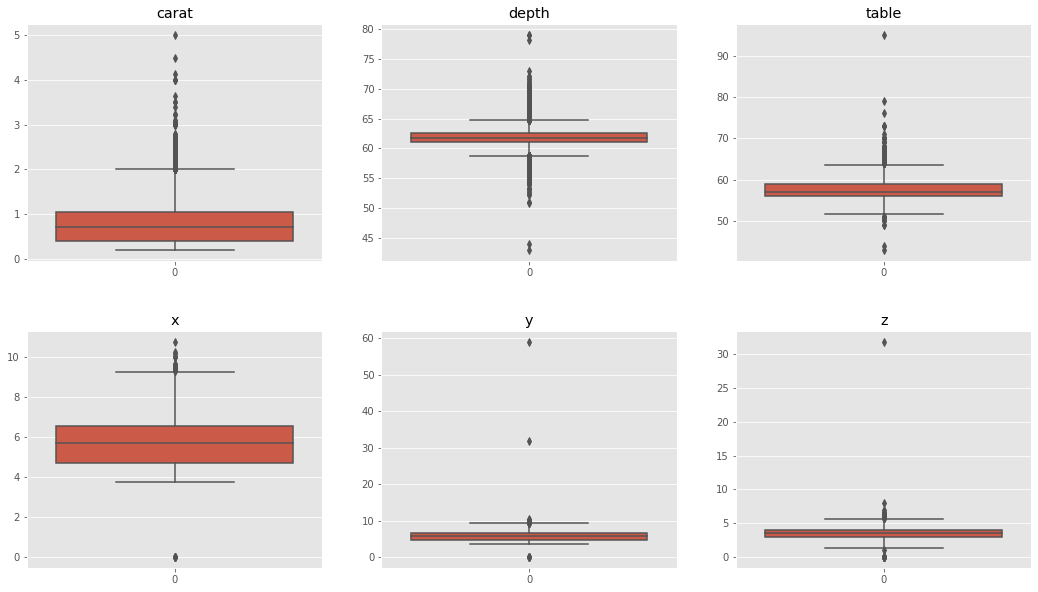

In [25]:
# Define list of column name
num_columns = X_train.select_dtypes(include=np.number).columns.tolist() 

# Create chart for loop
plt.figure(figsize=(18, 10))
for i,v in zip(range(len(num_columns)), num_columns):
    plt.subplot(2, 3, i+1), sns.boxplot(data=X_train[v]), plt.title(v)

# set the spacing between subplots
plt.subplots_adjust(hspace=0.3)
plt.show()

Teknik outliers handling sangat berkaitan dengan skewness distribusi data setiap features, oleh karena itu, skewness dari setiap feature perlu dihitung.

In [26]:
# Define dataframe with outliers and compute the skew
X_train_numerical = X_train.drop(columns=['cut','color','clarity'])
pd.DataFrame(X_train_numerical.skew(axis=0), columns=['skewness']).sort_values(by='skewness', ascending=True).T

,depth,x,table,carat,z,y
skewness,-0.053447,0.37939,0.814973,1.124805,1.804927,2.913411


Untuk teknik Sensoring ini, proses akan dilakukan kedalam tiga part... part pertama adalah proses sensoring dengan windsorizer pada feature distribusi normal (skewness : -0.5 sd 0.5 | windsoriser_normal dengan metode gaussian fold 3). Kemudian bagian yang kedua dan ketiga adalah windsoriser_skew & eskew dengan feature yang distribusinya skew (skewness 0.5 sd 1 or -0.5 sd -1) & extreme skew (skwness < -1 dan > 1, fold 3). Cara windsorizer dipilih karena semua data outliers ini kita anggap legitimate (bukan noise yang harus kita drop datanya), demikian kita adjust data outliers ini ke batas atas dan bawahnya sehingga semua informasi dari data tetap dapat diperhitungkan oleh model ML.<br>

In [27]:
# Create the capper | Skewness : normal
windsoriser_normal = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['depth', 'x'])
windsoriser_normal.fit(X_train)
X_train = windsoriser_normal.transform(X_train)

# Create the capper | Skewness : skew
windsoriser_skew = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['table'])
windsoriser_skew.fit(X_train)
X_train = windsoriser_skew.transform(X_train)

# Create the capper | Skewness : extreme skew
windsoriser_eskew = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['carat', 'y', 'z'])
windsoriser_eskew.fit(X_train)
X_train = windsoriser_eskew.transform(X_train)

**Outliers has been handled with windsorizer!**

# F. Pipeline & GridSearch

## F1. Define Column Transformer

Seperti outliers handling, skewness dari distribusi data setiap feature mempengaruhi algoritma scaling yang akan digunakan. oleh karena itu, skewness dari setiap feature perlu dihitung (after outliers has been handled).

In [28]:
# Define dataframe with outliers and compute the skew
X_numerical_o = X.drop(columns=['cut','color','clarity'])
pd.DataFrame(X_numerical_o.skew(axis=0), columns=['skewness']).sort_values(by='skewness', ascending=True).T

,depth,x,table,carat,z,y
skewness,-0.082213,0.378624,0.796864,1.116655,1.522756,2.43478


Berdasarkan masing-masing feature skewness, maka feature dengan skewness normal akan di-scaling dengan algoritma StandardScaler (contoh: depth dan x), kemudian untuk feature dengan skewness = skew, algoritma scaling yang digunakan adalah MinMaxScaler (contoh : table). Serta feature lainnya (skewness extreme), scalingnya akan menggunakan RobustScaler (contoh : carat, z dan y). Berikut di bawah ini adalah syntax untuk preprocessor-nya.

In [29]:
# Define columnn name for scaling and encoding
numeric_features_ss = ['depth', 'x']
numeric_features_mm = ['table']
numeric_features_rb = ['carat', 'z', 'y']
cat_features_ordinal = ['cut', 'color', 'clarity']

# Define scaling and encoding technique
numeric_transformer_ss = Pipeline([("scaler1", StandardScaler())])
numeric_transformer_mm = Pipeline([("scaler2", MinMaxScaler())])
numeric_transformer_rb = Pipeline([("scaler3", RobustScaler())])
cat_transformer_ordinal = Pipeline([("encoder1", OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], 
                                                                            ['J', 'I', 'H', 'G', 'F', 'E', 'D'], 
                                                                            ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]))])

# Define Transformer Column
preprocessor = ColumnTransformer(
    transformers=[
        ("num1", numeric_transformer_ss, numeric_features_ss),
        ("num2", numeric_transformer_mm, numeric_features_mm),
        ("num3", numeric_transformer_rb, numeric_features_rb),
        ("cat1", cat_transformer_ordinal, cat_features_ordinal)
    ]
)

## F2. Model Tuning + Pipe, Grid, & CV

Pada case ini, model regresi yang digunakan adalah Lasso. Ridge, XGBRFRegressor, serta DecisionTreeRegressor dengan hyperparameternya masing-masing. Untuk mempermudah proses coding (more efective & efficient) dan meng-improve model sehingga didapat akurasi model yang lebih akurat dan konsisten, maka Pipeline, GridSeach, dan Cross validation akan digunakan pada proses modeling.

In [30]:
# Simplify the process of building chains of transformations and models
pipe = Pipeline([('preprocessing', preprocessor), ("classifier", LinearRegression())])

# Define Hyperparameter for each model
param = [
        {'classifier': [Lasso(max_iter=6000)],
        'classifier__alpha': [0.01, 1, 10]},
        {'classifier': [Ridge(max_iter=6000)],
        'classifier__alpha': [0.01, 1, 10, 100]},
        {'classifier': [xg.XGBRFRegressor()],
        # 'classifier__n_estimators': [1000, 2000],
        'classifier__subsample': [0, 0.3, 0.6],
        # 'classifier__learning_rate': [0.05, 0.1, 0.20],
        # 'classifier__min_child_weight': [1, 10, 100],
        'classifier__max_depth': [2, 4, 6, 8, 10]},
        {'classifier': [DecisionTreeRegressor(random_state=42)],
        'classifier__max_depth': [2, 4, 6, 8, 10]}
        ]

In [31]:
# Define GridSearch with cross validation to find the best model 
grid_search = GridSearchCV(pipe, param_grid=param, cv=5, scoring='r2')

# Fit GridSearch Model to Train
grid_search.fit(X_train,y_train)

# Identify the best model and Hyperparameter
print("Best parameters: {}".format(grid_search.best_params_)), print('='*30)
print("Best cross-validation r2score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'classifier': XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=None, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               predictor=None, random_state=None, reg_alpha=None,
               sampling_method=None, scale_pos_weight=None, ...), 'classifier__max_depth': 10, 'classifier__subsample': 0.6}
Best cross-validation r2score: 0.98


Darai hasil grid_search, di peroleh model terbaik seperti pada hasil print di atas.

In [32]:
# Predict Train and Test Label with the best model
y_pred_train=grid_search.best_estimator_.predict(X_train)
y_pred_test=grid_search.best_estimator_.predict(X_test)

**Prediksi label pada train dan test sudah berhasil dilakukan.**

# G. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model<br>
berdasarkan metrics yang dipilih (which is `MAE, MAE, RMSE & r2score`).

In [33]:
# Model Evaluation `MAE, MSE, RMSE, dan R2Score`
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))
print('MAE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))
print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  263.94186575718993
MAE test =  301.06548864326254
MAE train =  240722.76212095682
MSE test =  325045.91118257074
RMSE train =  490.63506002013025
RMSE test =  570.1279778984458
r2score train =  0.9848234829032687
r2score test =  0.979834586855936


Hasil evaluasi dari model overall baik. Bisa dilihat dari nilai MAE train dan test dengan value sebesar ~ 268 & 305, not so much different which is good. Model yang digunakan overall good fit karena selain jarak antara nilai evaluasi test dan trainnya yang tidak beda jauh, juga karena nilai r2scorenya yang lebih besar dari 0.9, yaitu sebesar ~ 0.97. Adapun dari dataset price, range harga diamond adalah sebesar 300 sd 18.5K, dengan mediannya adalah sebesar ~ 2400 (lihat deskripsi pada bagian data loading data.describe). Demikian dengan nilai MAE train dan test yang dihasilkan, maka ratio error pada model dengan keseluruhan data price bisa dibilang cukup dan bisa kita anggap wajar (error bisa diterima dengan ratio ~1/10). Untuk price range diamond dengan harga yang mayority rendah (300 sd 2400), maka akurasi model might a little bit poor (karena error model ada di kisaran ~ 300 atau kurang dari itu), namun untuk diamond dengan harga di atas 2400 (apalagi untuk harga > 10K), overall error dari model sangat bisa diterima.

# H. Model Saving

In [34]:
# Save the Files
with open('XgBoost_model.pkl', 'wb') as file_1:
  joblib.dump(grid_search.best_estimator_, file_1)

# I. Inferencing

## 1. Load Model

In [35]:
# Load All Files 
with open('XgBoost_model.pkl', 'rb') as file_1:
  grid_search = joblib.load(file_1)

## 2. Predict

In [36]:
# Predict using Linear Regression 
y_pred_inf = grid_search.predict(data_inf)

# Create DataFrame of Rating's Prediction 
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['predict '+label_name])

In [37]:
# Concate between Inference-Set and Rating's Prediction
result = pd.concat([data_inf, y_pred_inf_df], axis=1)
result

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price,predict price
0,29246,0.34,Good,E,VS2,63.8,56.0,4.44,4.49,2.85,696,802.225708
1,10823,1.16,Very Good,I,VS2,62.6,59.0,6.63,6.69,4.17,4869,5102.455078
2,26315,2.10,Premium,I,SI1,61.5,59.0,8.28,8.24,5.08,15818,15589.609375
3,33791,0.32,Ideal,G,VVS1,61.1,57.0,4.41,4.43,2.70,842,906.459595
4,14203,1.01,Premium,G,VS2,61.2,58.0,6.46,6.49,3.96,5759,6175.257812
5,49006,0.53,Ideal,G,VVS2,60.4,56.0,5.29,5.24,3.18,2051,2010.344604
6,43919,0.31,Ideal,I,VS1,61.3,55.6,4.37,4.40,2.69,513,568.661499
7,165,0.79,Ideal,F,SI2,61.9,55.0,5.97,5.92,3.68,2771,2609.433105
8,20381,0.31,Premium,F,VS2,62.3,59.0,4.30,4.33,2.69,625,694.339233
9,47339,0.23,Very Good,E,VVS1,61.8,59.0,3.90,3.93,2.42,530,505.458374


In [38]:
Average_price = result['price'].mean()
Selisih = (result['predict price'].sum()-result['price'].sum())/10
print('Average diamond price : $', Average_price)
print('Average selisih antara diamond price vs prediksi : $', Selisih)
print('Ratio % Average selisih vs diamond price : ', ((Selisih/Average_price)*100).round(3), '%')


Average diamond price : $ 3447.4
Average selisih antara diamond price vs prediksi : $ 49.02421875
Ratio % Average selisih vs diamond price :  1.422 %


Dari perbandingan price vs prediksinya, maka diperoleh ratio error sebesar ~ 1.4% which is good dan bisa diterima based on overall prices.

# J. Kesimpulan

Dari hasil pemodelan diamond price yang sudah dikerjakan, maka dapat disimpulkan bahwa proses pembuatan model good-fit ML berhasil dilakukan (dengan XgBoost as the most optimal algoritm), dengan r2score model yang cukup memuaskan. Ratio error dengan dataset juga overall bisa diterima sehingga hasil prediksi dari model sudah cukup bisa diandalkan dalam melakukan estimasi diamond price. Insight dari proses pengolahan dari data ini adalah bahwa XGBoost menghasilkan model dari data test dan train yang lebih baik daripada model lainnya (dilihat dari hasil GridSearch-nya).

Adapun result dari model ML untuk prediksi ini masih bisa lebih baik jika kita mengimplementasi beberapa skenario lain, seperti : 1) dibandingkan melakukan sensoring pada data outliers, drop outliers juga bisa menjadi opsi untuk mengurangi jumlah outliers (karena jumlah outliers sebetulnya kurang dari 5%). XGBoost, model terbaik yang digunakan pada case ini dalam beberapa sumber menyebutkan bahwa XGBoost kurang perform pada dataset yang mengandung outliers namun perform dari sisi flexibility parameter, power untuk multiprocesing, serta mayority in most case, lbh baik dari beberapa model boosting lain, serta sudah build-in missing data handling dalam modelnya. 2) Kemudian skenario lain yg bisa dilakukan adalah : Feature dengan korelasi yang rendah seperti table dan depth bisa kita pertimbangkan untuk di-drop sebelum dilakukan process pembuatan model sehingga hasil evaluasi train dan test bisa lebih baik lagi. 3) Adding more dataset always good if our infrastructure is capable of doing the computation.